In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

#Generate training data

## first generate 10 cluster means for each class:

(-4, 4)

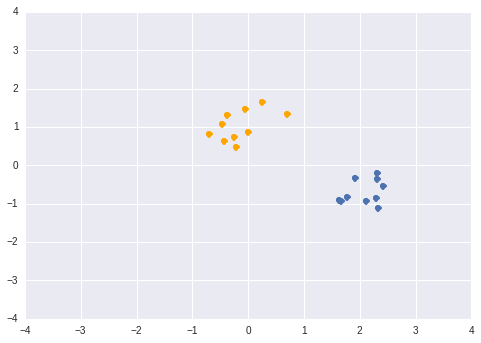

In [3]:
cov = np.identity(2)

#generate blue class:
#    generate m_1, ..., m_10 from N((1,0), I)
mean = [2,-1]
blue_m = np.random.multivariate_normal(mean,cov/10.0,10)

#generate green class:
#    generate m_1, ..., m_10 from N((0,1), I)
mean = [0,1]
orange_m = np.random.multivariate_normal(mean,cov/5.0,10)

plt.plot(orange_m[:,0],orange_m[:,1], 'o', color='orange')
plt.plot(blue_m[:,0],blue_m[:,1], 'o', color='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

## now generate the training data based on the centers

(-4, 4)

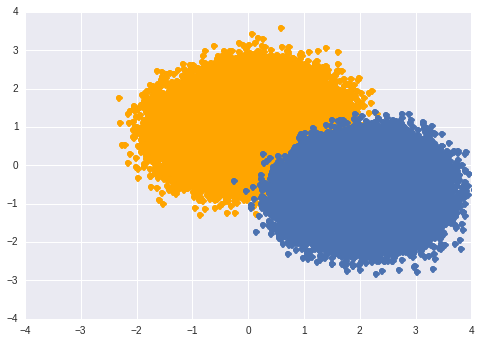

In [4]:
N = 100000
#greens:
oranges = []
for i in range(N):
    cur_mean = orange_m[np.random.randint(0,10)]
    
    new_point = np.random.multivariate_normal(cur_mean,cov/5,1)
    #print new_point
    oranges.append(new_point[0])
    
oranges = np.array(oranges)
plt.plot(oranges[:,0],oranges[:,1], 'o', color='orange')

blues = []
for i in range(N):
    cur_mean = blue_m[np.random.randint(0,10)]
    
    new_point = np.random.multivariate_normal(cur_mean,cov/5,1)
    #print new_point
    blues.append(new_point[0])
    
blues = np.array(blues)
plt.plot(blues[:,0],blues[:,1], 'o', color='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#Bayes Classifier

In [5]:
x_train = np.append(blues, oranges)
x_train = x_train.reshape((2*N,2))

y_train = np.append(np.zeros(N), np.ones(N)).reshape((2*N,1))

We want to maximize $P(xtrain, ytrain) = \prod P(x_i, y_i)$.

This is done by the decomposition:

$M[x_1, x_2, y] = $ number of occurences of $(x_1, x_2, y)$

$M[y] = \sum_{x_1,x_2} M[x_1, x_2, y] = $ number of occures of $y$

##Discretization

In [6]:
#use 0.5 x 0.5 squares for now
#use a dictionary, index by the bottom left corner of each square
bins = {}
for x in np.linspace(-60,60, 121):
    for y in np.linspace(-60,60, 121):
        bins[(x,y)] = [0,0]
        
#print bins
for i in range(len(x_train)):
    x = x_train[i]
    y = y_train[i][0]
    #print y
    corner = (int(np.floor(10.0 * x[0])),  int(np.floor(10.0 * x[1])))
    #print corner
    bins[corner][int(y)] += 1


##calculate parameters

In [7]:
numy1 = np.count_nonzero(y_train)
numy0 = len(y_train) - numy1

In [8]:
p_y = [0,0]
p_y[0] = 1.0*numy0 / len(y_train)
p_y[1] = 1.0*numy1 / len(y_train)

print p_y


[0.5, 0.5]


In [9]:
x1y0_bins = {}
x1y1_bins = {}
x2y0_bins = {}
x2y1_bins = {}
for k in np.array(bins.keys())[:,0]:
    x1y0_bins[k] = 0
    x1y1_bins[k] = 0
    x2y0_bins[k] = 0
    x2y1_bins[k] = 0
    

In [10]:
for b in bins:
    x1y0_bins[b[0]] += bins[b][0]
    x1y1_bins[b[0]] += bins[b][1]
    x2y0_bins[b[1]] += bins[b][0]
    x2y1_bins[b[1]] += bins[b][1]


In [11]:
for k in x1y0_bins:
    x1y0_bins[k] = 1.0*x1y0_bins[k]/numy0
    
for k in x1y1_bins:
    x1y1_bins[k] = 1.0*x1y1_bins[k]/numy1

for k in x2y0_bins:
    x2y0_bins[k] = 1.0*x2y0_bins[k]/numy0

for k in x2y1_bins:
    x2y1_bins[k] = 1.0*x2y1_bins[k]/numy1

##test data:

In [12]:
x_test = np.array([0,0])
for x in np.linspace(-4, 4, 100):
    for y in np.linspace(-4, 4, 100):
        x_test = np.vstack((x_test, np.array([x,y])))
        
x_test = x_test[1:]

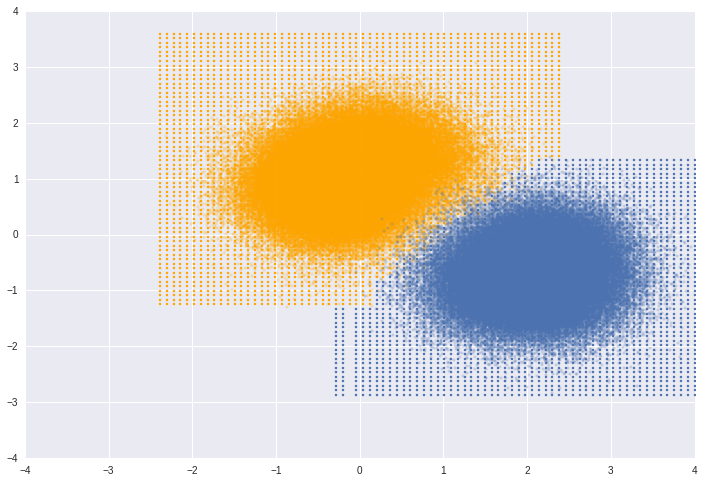

In [13]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)


#plot training data:
#ax.plot(greens[:,0],greens[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='orange')
#ax.plot(blues[:,0],blues[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='b')

plt.xlim([-4,4])
plt.ylim([-4,4])



for x in x_test:
    corner = (int(np.floor(10.0 * x[0])),  int(np.floor(10.0 * x[1])))
    
    py0 = p_y[0] * x1y0_bins[corner[0]] * x2y0_bins[corner[1]]
    py1 = p_y[1] * x1y1_bins[corner[0]] * x2y1_bins[corner[1]]

    if py0 > py1:
        ax.plot(x[0], x[1], '.', color='b', markersize=5)
    if py0 < py1:
        ax.plot(x[0], x[1], '.', color='orange', markersize=5)

plt.plot(oranges[:,0],oranges[:,1], 'o', color='orange', markersize=3, alpha=.25)
plt.plot(blues[:,0],blues[:,1], 'o', color='b', markersize=3, alpha=.25)
